# Benchmarking of integration methods
This notebook provides a short overview on how to use the scIB module and performs a short analysis of tabula muris thymus and bone marrow data.

In [2]:
import scanpy as sc
import scIB
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
file = '../red.h5ad'
batch = 'method'
hvg = None

## Read the data

In [5]:
adata = sc.read(file)

In [6]:
methods = {}

## Run the integration methods
The functions for the integration methods are in `scIB.integration`. Generally, the methods expect an anndata object and the batch key as an input. The runtime and memory usage of the functions are meaured using `scIB.metrics.measureTM`. This function returns memory usage in MB, runtime in s and the output of the tested function.

In [7]:
methods['scanorama'] = scIB.metrics.measureTM(scIB.integration.runScanorama, adata, batch)

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Found 12914 genes among all datasets
[[0.         0.85774059]
 [0.         0.        ]]
Processing datasets (0, 1)
memory usage:874.0 MB
runtime: 5.0 s


In [11]:
methods['scanorama'][2][0][1].obsm['X_pca'] = methods['scanorama'][2][0][0]

In [13]:
methods['bbknn'] = scIB.metrics.measureTM(scIB.integration.runBBKNN, adata, batch)

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../../../../../home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../../../../../home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py", line 350:
@nu

memory usage:14.0 MB
runtime: 4.0 s


In [6]:
#scgen = scIB.metrics.measureTM(scIB.integration.runScGen, adata, batch = batch)

In [14]:
methods['mnn'] = scIB.metrics.measureTM(scIB.integration.runMNN, adata, batch)

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "l2_norm" failed type inference due to: Invalid use of Function(<function norm at 0x7f52a011f6a8>) with argument(s) of type(s): (axis=Literal[int](1), x=array(float32, 2d, A))
 * parameterized
In definition 0:
    TypeError: norm_impl() got an unexpected keyword argument 'x'
    raised from /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/typing/templates.py:475
In definition 1:
    TypeError: norm_impl() got an unexpected keyword argument 'x'
    raised from /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/typing/templates.py:475
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: resolving callee type: Function(<function norm at 0x7f52a011f6a8>)
[2] Du

Performing cosine normalization...


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "l2_norm" failed type inference due to: Invalid use of Function(<function norm at 0x7f52a011f6a8>) with argument(s) of type(s): (axis=Literal[int](1), x=array(float32, 2d, A))
 * parameterized
In definition 0:
    TypeError: norm_impl() got an unexpected keyword argument 'x'
    raised from /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/typing/templates.py:475
In definition 1:
    TypeError: norm_impl() got an unexpected keyword argument 'x'
    raised from /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/typing/templates.py:475
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: resolving callee type: Function(<function norm at 0x7f52a011f6a8>)
[2] Du

Starting MNN correct iteration. Reference batch: 0
Step 1 of 1: processing batch 1
  Looking for MNNs...


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py:88: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "find_mutual_nn" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py (94)

File "../../../../../../../../../home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py", line 94:
def find_mutual_nn(data1, data2, k1, k2, n_jobs):
    <source elided>
    mutual_2 = []
    for index_2 in range(data2.shape[0]):
    ^

  @jit((float32[:, :], float32[:, :], int8, int8, int8))
/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "find_mutual_nn" was compiled in object mode without forceobj=True.

File "../../../../../../../../../home/icb/daniel.strobl/minicon

  Computing correction vectors...


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/ir_utils.py:1959: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'mnn2' of function 'compute_correction'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../../../../../home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py", line 107:
def compute_correction(data1, data2, mnn1, mnn2, data2_or_raw2, sigma):
    <source elided>
    vect_reduced = np.zeros((data2.shape[0], vect.shape[1]), dtype=np.float32)
    for index, ve in zip(mnn2, vect):
    ^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py:102: NumbaWarning: 
Compilation is falling back to object 

  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...
Done.
memory usage:715.0 MB
runtime: 28.0 s


In [15]:
methods['harmony'] = scIB.metrics.measureTM(scIB.integration.runHarmony, adata, batch)

memory usage:95.0 MB
runtime: 10.0 s


In [16]:
methods['seurat'] = scIB.metrics.measureTM(scIB.integration.runSeurat, adata, batch)

memory usage:1711.0 MB
runtime: 46.0 s


## Runtime analysis
Here, we compare the runtimes and the memory usage of all tested methods

In [23]:
mem = pd.Series()
time = pd.Series()
for i in methods.keys():
    mem[i]=methods[i][0]
    time[i]=methods[i][1]

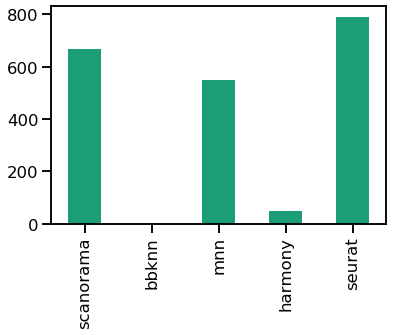

In [29]:
mem.plot.bar()
plt.show()

## Quantifying quality of Integration

### Silhouette score